## Investment Horizons

This is a simple exploration of investing scenarios. It uses the historical data from the S&P500 index to estimate the return of a potential strategy. Given a particular capital invested every year, it computes the final state X years after, estimating the return of the investment from the historical using two potential approaches: 1) random from a normal distribution of the returns, 2) mean value from a bootstrapping of the historical data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The annual distributions of returns of the S&P500 index con be observed below:

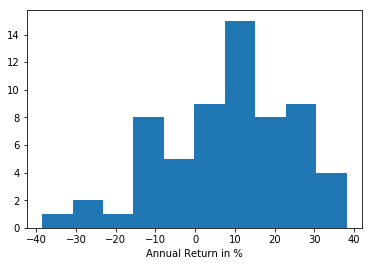

In [50]:
#Load annual returns for SP500 (since 1957)
SP = pd.read_csv('data-UZZDG.csv')

plt.hist(SP.Returns)
plt.xlabel('Annual Return in %')
plt.show()

While its distribution is not necesarily normal, we will assume that yes... because it is easy to do that!

In [13]:
#Mean and standard deviation of the SP500
SP_mean = np.mean(SP.Returns)
SP_sd = np.std(SP.Returns)

print(SP_mean, SP_sd)

7.956612903225808 16.19276171861868


We create the functions that will calculate the return of investment given the capital integrated every year, the average and standard deviation to calculate the return and the amount of years to integrate.

In [51]:
#Given an amount (capital), it integrates it return (given by a random normal with avg mean and sd std)
#and integrates to the amount from the year before, for anios years. The same capital is added every year.
#It returns a vector with the capital evolution

def invest(capital, anios, avg, sd):
    a = []
    for i in range(anios):
        ret = np.random.normal(avg, sd)
        if len(a) == 0: 
            a.append(capital*(100.0 + ret)/100.00)
        else:
            a.append((capital+a[-1])*(100.0 + ret)/100.00)
    return a

#Given an amount (capital), it integrates it return (given by a bootstrap sampling to the SP with size = size)
#and integrates to the amount from the year before, for anios years. The same capital is added every year.
#It returns a vector with the capital evolution

def invest_bootstrap(capital, anios, SP, size):
    a = []
    for i in range(anios):
        ret = np.mean(np.random.choice(SP,replace=True,size=size))
        if len(a) == 0: 
            a.append(capital*(100.0 + ret)/100.00)
        else:
            a.append((capital+a[-1])*(100.0 + ret)/100.00)
    return a

Now, in order to evaluate potential scenarios, we repeat 1000 times to see the minimum, maximum and average return of the strategy to integrate the same capital every year in the S&P500 for a period of time

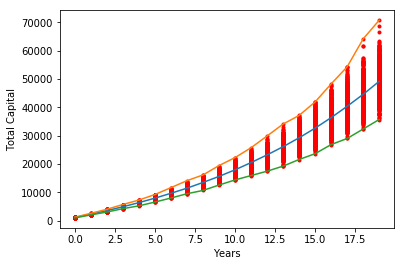

Probability of more than $ 20000 :  100.0 %
Min-Max Integrated Capital $ 35701.26 - 70777.46
Avg Integrated Capital $ 49184.01 +- 5062.85


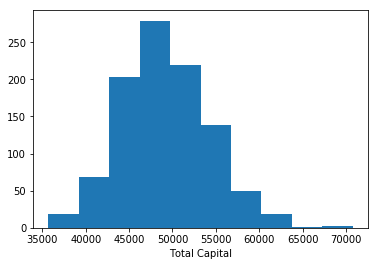

In [56]:
#1000 repetitions of 20 years simulations, integrating 1000 every year
rep = 1000
anios = 20
integracion = 1000
a_sim = []
for i in range(rep):
    
    #Using the normal approximation
    #a = invest(integracion,anios,SP_mean,SP_sd)
    
    a = invest_bootstrap(integracion,anios,SP.Returns, 20)
    #Using the bootstrapping
    
    a_sim.append(a)
    plt.plot(a,'r.')
a_sim = np.array(a_sim)
a_mean = np.mean(a_sim,axis = 0)
a_max = np.max(a_sim,axis = 0)
a_min = np.min(a_sim,axis = 0)
plt.plot(a_mean)
plt.plot(a_max)
plt.plot(a_min)
plt.xlabel('Years')
plt.ylabel('Total Capital')
plt.show()
plt.hist(a_sim[:,anios-1])
plt.xlabel('Total Capital')
print('Probability of more than $', anios*integracion,': ', 100*np.sum(a_sim[:,17] > anios*integracion)/rep, '%')
print('Min-Max Integrated Capital $', round(a_min[-1],2), '-', round(a_max[-1],2))
print('Avg Integrated Capital $', round(a_mean[-1],2) ,'+-', round(np.std(a_sim, axis = 0)[-1],2))


Both approaches yield similar mean returns (about $50K), but the normal approximation seems to yield more extreme results than the bootstrap.